<a href="https://colab.research.google.com/github/NguyenMinhThangNMT/HomeWorks/blob/main/Food.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from os import listdir
from numpy import asarray,save
from keras.utils import load_img, img_to_array

In [ ]:
#Xử lí dữ liệu Train
folder = '/content/drive/MyDrive/ANH AI/Food/Train/'

photos, labels = list(), list()
for file in listdir(folder) :
  output = 0.0
  if file.startswith('Com_suon_'):
    output = 1.0
  if file.startswith('Banh_mi_'):
    output = 2.0
  if file.startswith('Hu_tieu_'):
    output = 3.0
  if file.startswith('Bun_thit_'):
    output = 4.0
  if file.startswith('Banh_xeo_'):
    output = 5.0

  photo = load_img(folder + file, target_size = (30,40))
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)
photos_train = asarray(photos)
labels_train = asarray(labels)
print(photos_train.shape, labels_train.shape)


save('/content/drive/MyDrive/ANH AI/Flower/Train/Food_photo.npy',photos_train)
save('/content/drive/MyDrive/ANH AI/Flower/Train/Food_label.npy',labels_train)

(24, 30, 40, 3) (24,)


In [ ]:
#Xử lí dữ liệu Test
folder = '/content/drive/MyDrive/ANH AI/Food/Test/'
photos, labels = list(), list()
for file in listdir(folder) :
  output = 0.0
  if file.startswith('Com_suon_'):
    output = 1.0
  if file.startswith('Banh_mi_'):
    output = 2.0
  if file.startswith('Hu_tieu_'):
    output = 3.0
  if file.startswith('Bun_thit_'):
    output = 4.0
  if file.startswith('Banh_xeo_'):
    output = 5.0
 
  photo = load_img(folder + file, target_size = (30,40))
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)
photos_test = asarray(photos)
labels_test = asarray(labels)
print(photos_test.shape, labels_test.shape)
save('/content/drive/MyDrive/Mon AI/Food_photo_test.npy',photos_test)
save('/content/drive/MyDrive/Mon AI/Food_photo_test.npy',labels_test)

(15, 30, 40, 3) (15,)


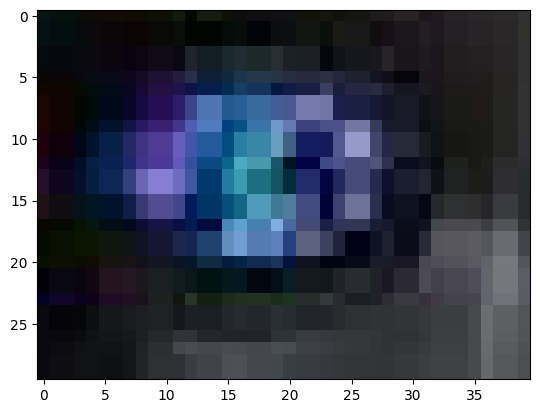

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
chosen_idx = 8
chosen_img = photos_train[chosen_idx]
plt.imshow((chosen_img*255).astype(np.uint8))
plt.show()

In [ ]:
#In các phần tửtử
print('số ảnh dùng để train:',len(photos_train))
print('số ảnh dùng để tét:',len(photos_test))
print('Kích cỡ ảnh trailen',(photos_train.shape))
print('Kích cỡ ảnh label:',labels_train.shape)
print('Kích cỡ ảnh test:',photos_test.shape)
print('Kích cỡ ảnh test_label:',labels_test.shape)

số ảnh dùng để train: 24
số ảnh dùng để tét: 15
Kích cỡ ảnh trailen (24, 30, 40, 3)
Kích cỡ ảnh label: (24,)
Kích cỡ ảnh test: (15, 30, 40, 3)
Kích cỡ ảnh test_label: (15,)


In [ ]:
photos_train = photos_train.reshape(24, 30, 40, 3)
photos_train = photos_train.astype('float32')/255 
photos_test = photos_test.reshape(15, 30, 40, 3)
photos_test = photos_test.astype('float32')/255

from keras.utils import  to_categorical
labels_train = to_categorical(labels_train)
labels_test = to_categorical(labels_test)
photos_train.shape, labels_train.shape, photos_test.shape, labels_test.shape

((24, 30, 40, 3), (24, 6), (15, 30, 40, 3), (15, 6))

In [ ]:
from keras.models import Sequential, Model
from keras import Input, Model
from keras.optimizers import Adam
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers import BatchNormalization, LeakyReLU

batch_size = 64
epochs = 20
classes = 6
model = Sequential()

#CNN
model.add(Conv2D(32, kernel_size = (3,3), activation = 'linear',input_shape = (30,40,3), padding = 'same')) 

# nhan tich chap 32 lan
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(64, (3,3), activation = 'linear', padding ='same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(128, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))

#Xây dựng mang noron(Lớp phẳng,lớp ẩn, đầu ra)
model.add(Flatten())
model.add(Dense(128, activation = 'linear'))
model.add(LeakyReLU(alpha = 0.1))
model.add(Dense(classes, activation ='softmax'))

In [ ]:
#compile
model.compile(optimizer = Adam(), loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()
train = model.fit(photos_train, labels_train, batch_size = batch_size , epochs = epochs, verbose = 1)

test_loss, test_acc = model.evaluate(photos_test, labels_test)
print('do chinh xac', test_acc)
print('ham mat mat', test_loss)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 40, 32)        896       
                                                                 
 leaky_re_lu_8 (LeakyReLU)   (None, 30, 40, 32)        0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 15, 20, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 15, 20, 64)        18496     
                                                                 
 leaky_re_lu_9 (LeakyReLU)   (None, 15, 20, 64)        0         
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 8, 10, 64)        0         
 2D)                                                  

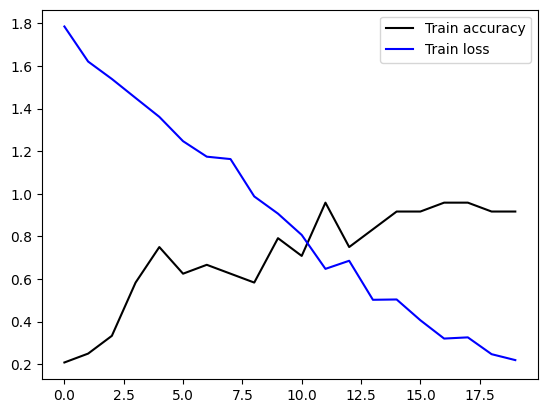

In [ ]:
accuracy = train.history['accuracy']
loss = train.history['loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'k', label = 'Train accuracy')
plt.plot(epochs, loss, 'b', label = 'Train loss')
plt.legend(['Train accuracy', 'Train loss'])
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/Mon AI/food.h5')

In [ ]:
class_name = {1: 'com suon',2:'banh mi',3:'hu tieu',4:'bun thit nuong',5:'banh xeo'}

1/1 [==============================] - 0s 22ms/step
Predicted:  com suon


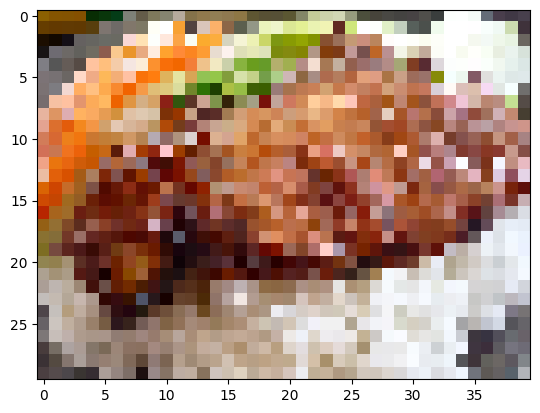

In [ ]:
#test
filePath = '/content/drive/MyDrive/ANH AI/Com_suon.jpg'
testImage = load_img(filePath, color_mode = 'rgb', target_size=(30,40))
arrayImage = img_to_array(testImage).reshape(1,30,40,3)/255
pred = np.argmax(model.predict(arrayImage))
print("Predicted: ", class_name[pred])
plt.imshow(testImage)